In [46]:

#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
#for excel install pip install openpyxl

In [49]:

df = pd.read_excel(r"C:\Users\Pratiksha\Downloads\Heartattack_prediction_data.xlsx")

In [50]:
#exploaration
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [52]:
df.shape

(4312, 14)

In [54]:
#data cleaning
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [55]:
df.duplicated().sum()

np.int64(68)

In [56]:
#remove null values from entire data
df1 = df.dropna()

In [57]:
df1.isnull().sum()

Sex                    0
Age                    0
Heart Rate             0
Glucose                0
BMI                    0
Smoker                 0
Ciggarates(Per Day)    0
Hypertension           0
Systolic  BP           0
Diastolic BP           0
ON BP Medication       0
Previous Stroke        0
Diabetic               0
RiskOfCHD              0
dtype: int64

In [58]:
df1.drop_duplicates(inplace=True)

In [59]:
df1

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,39,85.0,80.0,20.91,1,30.0,0,133.0,86.0,0.0,0,0,0
4277,0,39,85.0,131.0,22.35,1,9.0,0,114.0,64.0,0.0,0,0,0
4284,0,43,70.0,66.0,29.89,0,0.0,0,123.5,77.5,0.0,0,0,0
4289,0,60,65.0,72.0,26.59,0,0.0,0,110.0,72.5,0.0,0,0,0


In [60]:
df1.duplicated().sum()

np.int64(0)

In [61]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,3949.0,0.436313,0.495990,0.00,0.00,0.00,1.00,1.0
Age,3949.0,49.549253,8.561709,32.00,42.00,49.00,56.00,70.0
Heart Rate,3949.0,75.794125,12.017503,44.00,68.00,75.00,83.00,143.0
Glucose,3949.0,82.040010,23.496781,40.00,72.00,78.00,87.00,394.0
BMI,3949.0,25.797371,4.067156,15.54,23.08,25.38,28.04,56.8
Smoker,3949.0,0.489997,0.499963,0.00,0.00,0.00,1.00,1.0
Ciggarates(Per Day),3949.0,9.031907,11.962920,0.00,0.00,0.00,20.00,70.0
Hypertension,3949.0,0.309952,0.462532,0.00,0.00,0.00,1.00,1.0
Systolic BP,3949.0,132.273614,21.939643,83.50,117.00,128.00,143.50,295.0
Diastolic BP,3949.0,82.869840,11.881098,48.00,75.00,82.00,89.50,142.5


In [62]:
df1.describe().T.style.background_gradient( cmap= 'Reds')

,count,mean,std,min,25%,50%,75%,max
Sex,3949.000000,0.436313,0.495990,0.000000,0.000000,0.000000,1.000000,1.000000
Age,3949.000000,49.549253,8.561709,32.000000,42.000000,49.000000,56.000000,70.000000
Heart Rate,3949.000000,75.794125,12.017503,44.000000,68.000000,75.000000,83.000000,143.000000
Glucose,3949.000000,82.040010,23.496781,40.000000,72.000000,78.000000,87.000000,394.000000
BMI,3949.000000,25.797371,4.067156,15.540000,23.080000,25.380000,28.040000,56.800000
Smoker,3949.000000,0.489997,0.499963,0.000000,0.000000,0.000000,1.000000,1.000000
Ciggarates(Per Day),3949.000000,9.031907,11.962920,0.000000,0.000000,0.000000,20.000000,70.000000
Hypertension,3949.000000,0.309952,0.462532,0.000000,0.000000,0.000000,1.000000,1.000000
Systolic BP,3949.000000,132.273614,21.939643,83.500000,117.000000,128.000000,143.500000,295.000000
Diastolic BP,3949.000000,82.869840,11.881098,48.000000,75.000000,82.000000,89.500000,142.500000


In [63]:
### univeriate analysis

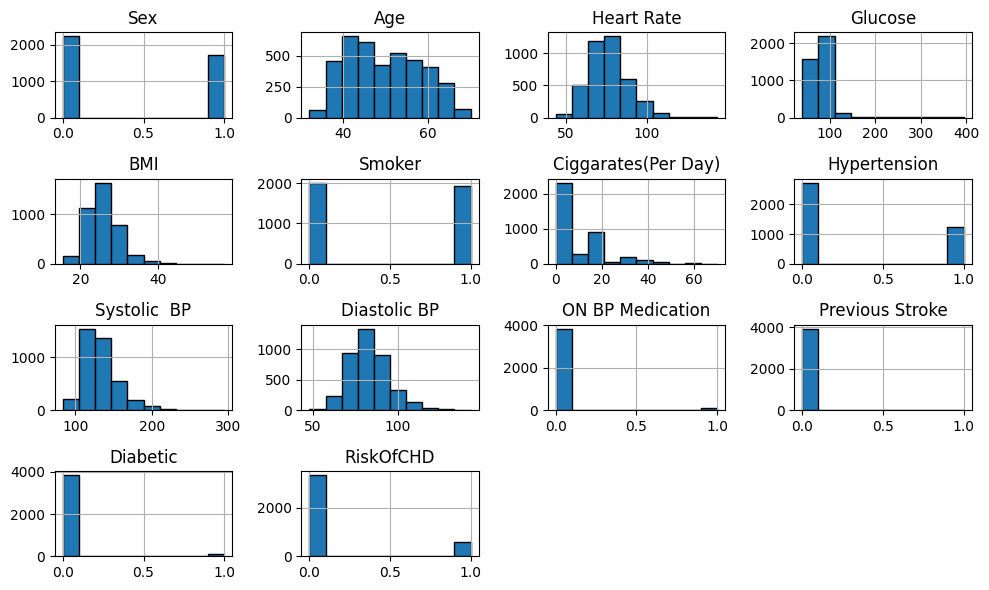

In [64]:

df1.hist(figsize= (10,6),bins=10, edgecolor = 'k')
plt.tight_layout()
plt.show()

In [65]:
#df1.plot (kind= 'box',figsize=(10,6,bins=10, edgecolor = 'k'))
#plt.xticks
#plt.tight_layout()
#plt.show()

In [66]:
##apply correlation

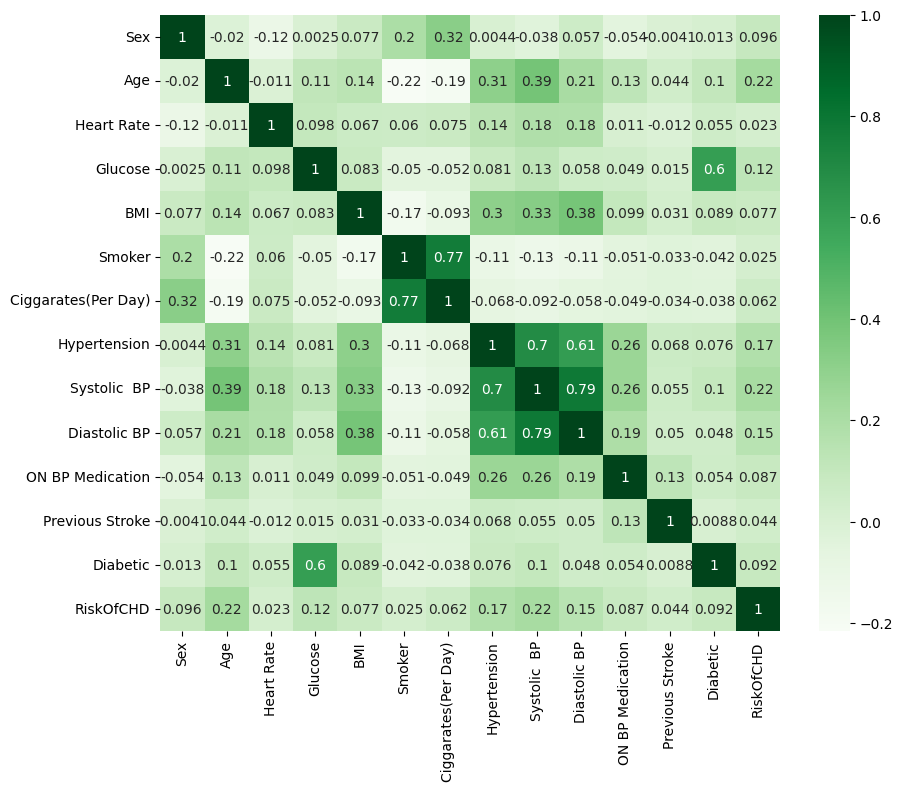

In [67]:

corr =df1.corr()
corr
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot= True, cmap='Greens')
plt.show()

In [68]:
df1.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

In [69]:
#seperate dependent independent variables

In [70]:

x=df1.drop('RiskOfCHD', axis=1)
y=df1['RiskOfCHD']

In [71]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)

In [72]:
#initializing model


In [73]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
#prdicting model

In [75]:

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
### **Finding Entropy and Information Gain**

In [77]:
import math

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))

# Function to calculate conditional entropy
def conditional_entropy(data, feature, target):
    feature_values = data[feature].unique()  # Corrected: use .unique() on the series
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy


# Calculate information gain for each feature

for feature in x:
    ig = information_gain(df,feature,'RiskOfCHD')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Sex: 0.005159852850740165
Information Gain for Age: 0.042926979038824475
Information Gain for Heart Rate: 0.012971520214636323
Information Gain for Glucose: 0.06455079920525542
Information Gain for BMI: 0.2495886140190366
Information Gain for Smoker: 0.0002634323822181539
Information Gain for Ciggarates(Per Day): 0.009891657601884152
Information Gain for Hypertension: 0.02154015299443257
Information Gain for Systolic  BP: 0.08036065937081682
Information Gain for Diastolic BP: 0.046391701941965735
Information Gain for ON BP Medication: 0.014201408841048258
Information Gain for Previous Stroke: 0.0019726793109147156
Information Gain for Diabetic: 0.0052865710342104855


<function matplotlib.pyplot.show(close=None, block=None)>

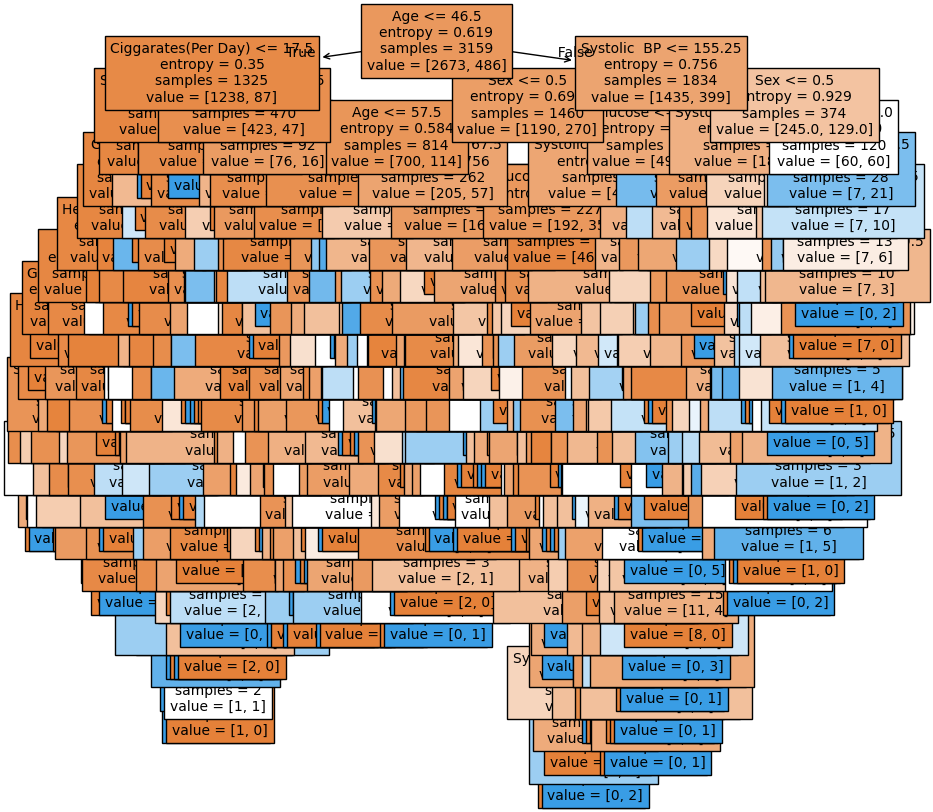

In [78]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names=x.columns, filled=True, fontsize=10)
plt.show

In [79]:
from sklearn.tree import export_graphviz
from IPython.display import Image

import pydotplus
# Export the tree to DOT format
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=x_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
##accuracy

# Evaluate the model

In [ ]:

accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
##prdict new data

In [ ]:
x_test.head(1)

In [ ]:
new_data = [[1,50,70,45,22,1,0,0,120,80,0,0,1]]
prediction = model.predict(new_data)
if prediction [0] == 0:
    print('No RiskofCHD')
else:
    print('RiskofCHD')
    

In [ ]:
### **Model Deploy into Pikle file**

In [ ]:
import joblib
joblib.dump(model, 'RiskofCHD.pkl') 

In [ ]:
riskofCHD = joblib.load('RiskofCHD.pkl')
riskofCHD

In [ ]:
new_data = [[1,60,72,45,22,1,0,0,122,82,0,0,1]]
prediction = model.predict(new_data)
if prediction [0] == 0:
    print('No RiskofCHD')
else:
    print('RiskofCHD')
    

In [ ]:
#Model building

In [ ]:
x = df1.drop('RiskOfCHD', axis=1)
y = df1['RiskOfCHD']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    stratify=y, 
    test_size=0.2, 
    train_size=0.8, 
    random_state=42
)


In [ ]:
#apply 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled =sm.fit_resample(x_train, y_train)

#checking distribution
print("Before:", y_train.value_counts())
print("After:", y_train_resampled.value_counts())

Before: RiskOfCHD
0    2680
1     479
Name: count, dtype: int64
After: RiskOfCHD
0    2680
1    2680
Name: count, dtype: int64


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy')